# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

## Аналитика

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

Прочитаем датасеты, откроем и изучим их. Начнем с моделей самолетов и количества рейсов для каждой модели в сентябре 2018 года.

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_1.info()
query_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [3]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Видим, что всего у нас представлено 8 моделей самолетов, и чаще всего в сентябре 2018 года осуществлялись рейсы Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100.

Далее посмотрим на города и на среднее количество рейсов, прибывающих в город за день в сентябре 2018 года.

In [4]:
query_3 = pd.read_csv('/datasets/query_3.csv')
query_3.info()
query_3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [5]:
query_3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


У нас представлена выборка из 101 города. Так как столбец average_flights представляет среднее количество рейсов, прибывающих в город за день в сентябре 2018 года, то исправим тип данных с float64 на целочисленный формат int.

In [6]:
query_3['average_flights'] = query_3['average_flights'].astype('int')
query_3.describe()

,average_flights
count,101.000000
mean,5.217822
std,13.061090
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,129.000000


Выбрем топ-10 городов по количеству рейсов.

In [7]:
top10_cities=query_3.sort_values(by='average_flights', ascending=False).head(10)
top10_cities

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


Видим, что Москва на первом месте по количеству осуществляемых рейсов за сентябрь 2018 года.  Очевидно, так как это столица и самый крупынй город, также в Москве очень много пересадок на разные страны, в которые с других городов проблематично улететь.

Также Питер на втором месте, аналогично один из самых крупнейших городов, который еще и близок к границе с Европой.

Новосибирск, Екатеринбург и Красноярск также ялвются крупнейшиними городами в России, что и делает их центрами для авиаперевозок.


Далее построим графики:  
модели самолётов и количество рейсов,    
города и количество рейсов,   
топ-10 городов и количество рейсов.

**Зависимость количества рейсов от модели самолета**

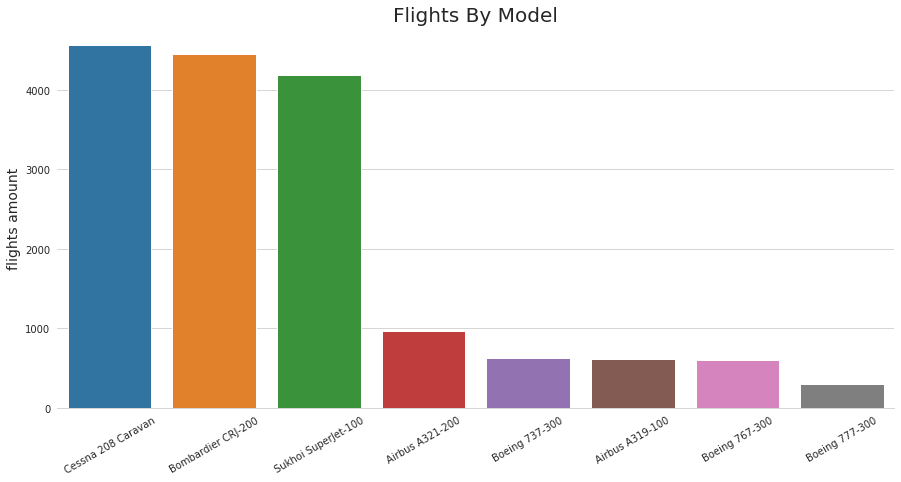

In [11]:
flights_by_model = query_1.sort_values(by='flights_amount', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))
plt.title('Flights By Model', fontsize=20)
sns.barplot(x='model', y='flights_amount', data=flights_by_model, label="line")
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('flights amount', fontsize=14)
plt.xticks(rotation=30)
plt.show()

Самолеты моделей Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100 совершают значительно большее количество полетов по сравнению с другими моделями. Лидируют самолеты небольшой вместимости, летающие на короткие расстояния. Поэтому логично, что рейсов на них совершается больше. Меньше всего перелетов у крупнейшего Boeing 777-300.

**Зависимость количества рейсов от города**

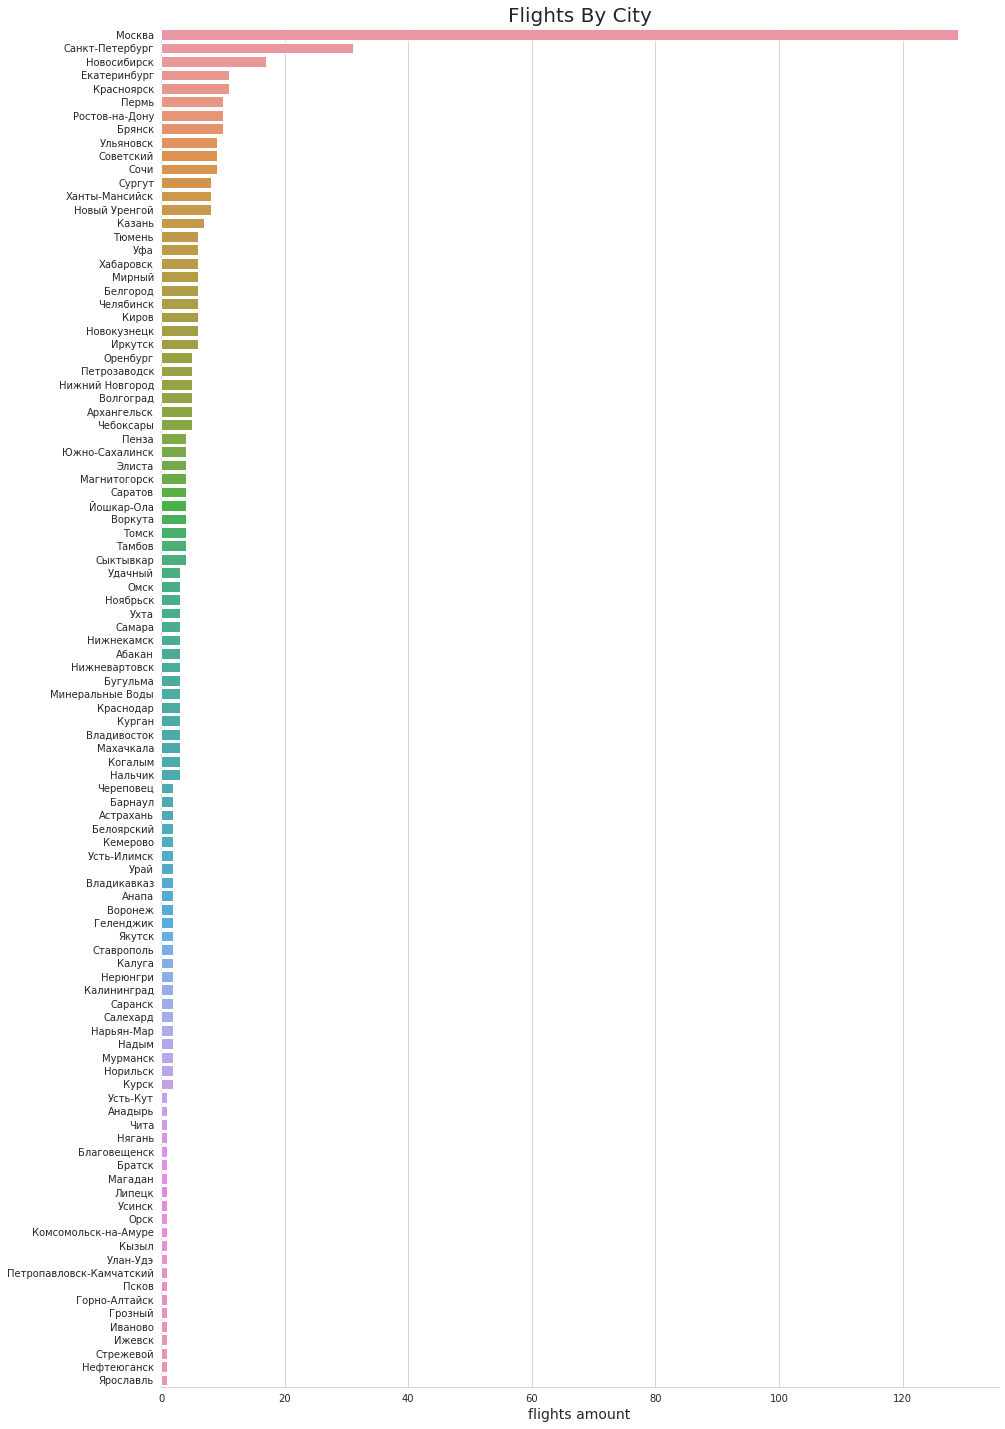

In [13]:
flights_by_city = query_3.sort_values(by='average_flights', ascending=False)

plt.figure(figsize=(15, 25))
plt.title('Flights By City', fontsize=20)
sns.barplot(x='average_flights', y='city', data=flights_by_city)
sns.despine(left=True)
plt.ylabel('')
plt.xlabel('flights amount', fontsize=14)
plt.show()

Популярными городами являются Москва, Санкт-Петербург и Новосибирск, как мы и выяснили, когда выделяли топ 10 городов. Логично, что больше всего рейсов совершается через Москву, так как это столица и самый крупынй город, через который осуществляется очень много пересадок на разные страны, в которые с других городов проблематично улететь. Санкт-Петербург и Новосибирск являются важными воздушнотранспортными узлами, где можно пересесть на международный рейс или стыковочный. Также их популярность связана с тем, сколько аэропортов имеет каждый город. Москва снова лидер по данному пункту. 

**Зависимость количества рейсов от города**

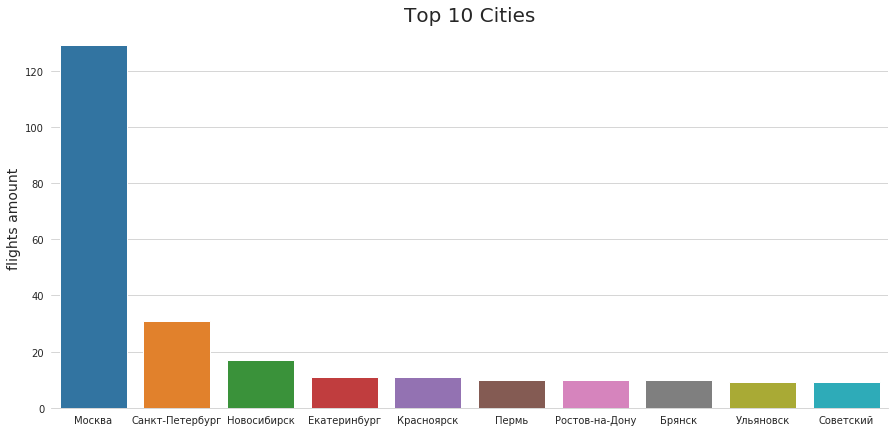

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7))
plt.title('Top 10 Cities', fontsize=20)
sns.barplot(x='city', y='average_flights', data=top10_cities.sort_values(by='average_flights', ascending=False))
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('flights amount', fontsize=14)
plt.show()

Тройка лидеров очевидна - Москва, Санкт-Петербург, Новосибирск. В остальных городах попавших в ТОП-10 всего около 10 перелетов.

### Выводы 

Итого, самые популярные модели самолета Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100 выполняли значительно больше других рейсов. Модели Airbus и Boeing менее использовались авиакомпанией в сентябре 2018г.
В распределении по количеству рейсов с огромным преимуществом лидирует Москва. Это объясняется тем, что город столица, культурный и финансовый центр, и самый большой по численности населения город России, а также с наибольшим количестов аэропортов. 